In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [45]:
def slice_sampling_dual_visual(f, x_init=0.25, m=100, stepsize=0.5, x_range=(-4, 4), grid_size=200):
    """
    Performs slice sampling for a given density function f(x) and visualizes the sampled points in two ways:
    1. At their corresponding slice height y (cyan stars).
    2. Projected onto a separate x-axis at the bottom of the plot (semi-transparent yellow circles).
    
    Parameters:
    - f: function, the probability density function (up to a constant)
    - x_init: float, initial starting value
    - m: int, number of samples
    - stepsize: float, width of slice steps
    - x_range: tuple, range of x values for visualization
    - grid_size: int, number of points to use in the density plot
    
    Returns:
    - samples_x: array of sampled x values
    - samples_y: array of corresponding slice heights
    """

    def slice_f_at_y(f, x, y, stepsize):
        """Finds a new sample using slice sampling given a horizontal slice height y."""
        a, b = x - stepsize, x + stepsize  # Initial interval centered at x
        
        # Expand until both endpoints satisfy f(a) < y and f(b) < y
        while f(a) > y:
            a -= stepsize
        while f(b) > y:
            b += stepsize
        
        # Sample a new x from [a, b]
        while True:
            x_new = np.random.uniform(a, b)
            if f(x_new) > y:
                return x_new  # Accept if it's within the slice
            elif x_new < x:
                a = x_new  # Shrink left
            else:
                b = x_new  # Shrink right

    # Initialize storage and starting value
    x_samples = np.zeros(m)
    y_samples = np.zeros(m)  # Store slice heights

    x_samples[0] = x_init

    # Perform slice sampling
    for t in range(1, m):
        y_samples[t] = np.random.uniform(0, f(x_samples[t-1]))  # Correct slice height
        x_samples[t] = slice_f_at_y(f, x_samples[t-1], y_samples[t], stepsize)

    # Create density plot
    x_grid = np.linspace(x_range[0], x_range[1], grid_size)
    y_vals = f(x_grid)

    fig, ax = plt.subplots(figsize=(6, 5), facecolor="black")
    plt.style.use("dark_background")

    # Main density plot
    ax.plot(x_grid, y_vals, color="orange", label="Target density $f(x)$")
    ax.scatter(x_samples, y_samples, color="cyan", marker="*", label="Samples at slice heights")
    
    # Mark y = 0 line
    ax.axhline(0, color="white", linestyle="--", alpha=0.5)  

    ax.set_xlabel("x")
    ax.set_ylabel("Density / Slice height $y$")
    ax.set_title(f"Slice Sampling: Process & Projection ({m} Samples)", color="white")
    ax.legend()

    # Create a secondary axis below for projected samples
    ax_proj = ax.inset_axes([0, -0.15, 1, 0.05], transform=ax.transAxes)  # Create inset axis below the main plot
    ax_proj.set_xlim(x_range)
    ax_proj.set_xticks([])
    ax_proj.set_yticks([])
    ax_proj.set_frame_on(True)

    ax_proj.scatter(x_samples, np.zeros_like(x_samples), color="yellow", marker="o", alpha=0.4, label="Projected samples")

    ax_proj.spines["top"].set_visible(False)
    ax_proj.spines["left"].set_visible(False)
    ax_proj.spines["right"].set_visible(False)
    ax_proj.spines["bottom"].set_color("white")

    plt.show()
    
    return x_samples, y_samples

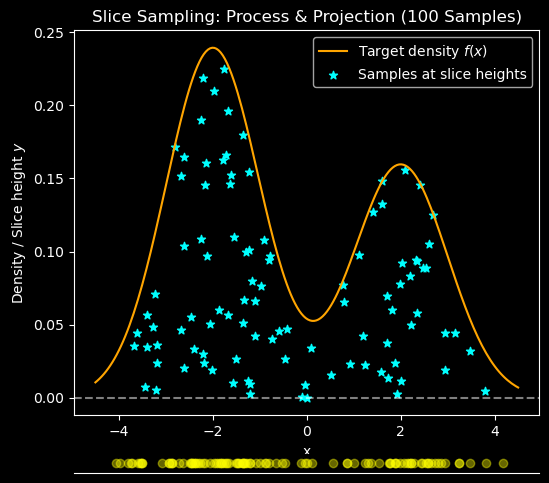

In [47]:
f = lambda x: 0.6 * stats.norm(-2, 1).pdf(x) + 0.4 * stats.norm(2, 1).pdf(x)
samples_x, samples_y = slice_sampling_dual_visual(f, m=100, x_init=0.0, stepsize=0.5, x_range=(-4.5, 4.5))
